# **Abalone Case Study Model**

In [107]:
from google.colab import drive

In [108]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Getting Started**

**Problem Statement:**

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

**Attribute Information**

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

-----------------------------
Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [109]:
#Importing the python libraries and packages

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [110]:
#Reading the CSV file of the dataset
#Pandas read_csv() function imports a CSV file (in our case, ‘abalone.csv’) to DataFrame format.

df = pd.read_csv("/content/drive/MyDrive/Python_Datasets/abalone.csv")

In [111]:
#Examining the Data
#After importing the data, to learn more about the dataset, we’ll use .head() .info() and .describe() methods.

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [112]:
#The .info() method will give you a concise summary of the DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


**Observation** : We have float type value in all independent variables and Rings is our target variable .

In [113]:
#The shape of the dataset

df.shape

(4177, 9)

**Observation** : This shows that our dataset contains 4177 rows i.e. instances of abalone and 9 columns i.e. the specifications like Length , Diameter ,     Height , Whole weight , Shucked weight etc.

In [114]:
#Unique occurrences of ‘Sex’ column

df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

**Observation** : As we can see, there are 3 unique values in the ‘Sex’ column of the dataset. 

In [115]:
#Count of the unique occurrences of ‘Sex’ column

df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

**Observation** : There are 1528 male , 1307 female and 1342 other category present in the abalone dataset

In [116]:
df.describe

<bound method NDFrame.describe of      Sex  Length  Diameter  ...  Viscera weight  Shell weight  Rings
0      M   0.455     0.365  ...          0.1010        0.1500     15
1      M   0.350     0.265  ...          0.0485        0.0700      7
2      F   0.530     0.420  ...          0.1415        0.2100      9
3      M   0.440     0.365  ...          0.1140        0.1550     10
4      I   0.330     0.255  ...          0.0395        0.0550      7
...   ..     ...       ...  ...             ...           ...    ...
4172   F   0.565     0.450  ...          0.2390        0.2490     11
4173   M   0.590     0.440  ...          0.2145        0.2605     10
4174   M   0.600     0.475  ...          0.2875        0.3080      9
4175   F   0.625     0.485  ...          0.2610        0.2960     10
4176   M   0.710     0.555  ...          0.3765        0.4950     12

[4177 rows x 9 columns]>

In [117]:
# checking the features, their shape, duplicate values and nan values in the Datasets

print("\nFeatures Present in the Dataset: \n", df.columns)
shape=df.shape
print("\nTotal Number of Rows : ",shape[0])
print("Total Number of Features : ", shape[1])
print("\n\nData Types of Features :\n", df.dtypes)
print("\nDataset contains any NaN/Empty cells : ", df.isnull().values.any())
print("\nTotal number of empty rows in each feature:\n", df.isnull().sum(),"\n\n")
print("Total number of unique values in each feature:")
for col in df.columns.values:
    print("Number of unique values of {} : {}".format(col, df[col].nunique()))
    


Features Present in the Dataset: 
 Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Total Number of Rows :  4177
Total Number of Features :  9


Data Types of Features :
 Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Dataset contains any NaN/Empty cells :  False

Total number of empty rows in each feature:
 Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64 


Total number of unique values in each feature:
Number of unique values of Sex : 3
Number of unique values of Length : 134
Number of unique values of Diameter : 111
Number of unique value

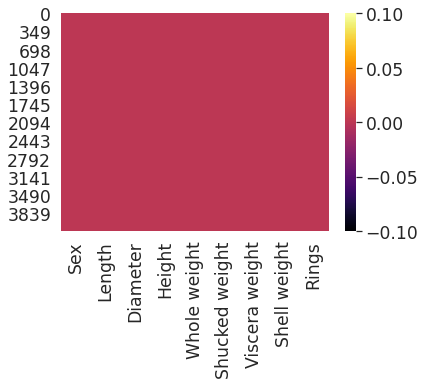

In [118]:
#Checking of null values in our dataset by passing a heatmap function.

sns.heatmap(df.isnull(),cmap='inferno')

**Observation** : There are no null values present in the dataset .

# **EDA (Exploratory Data Analysis)**

**Univariate Analysis**

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


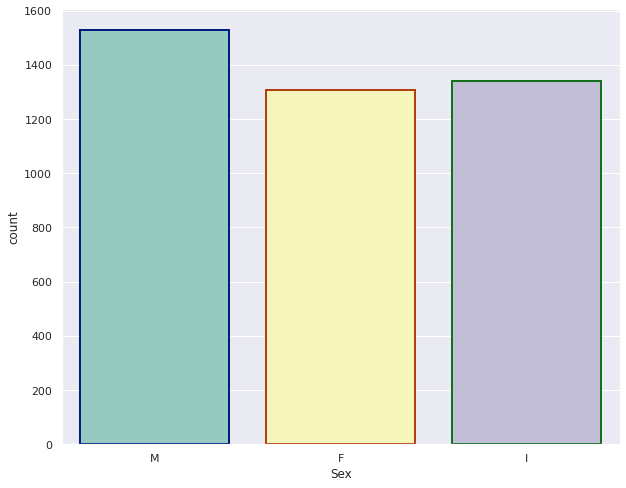

In [119]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
sns.countplot(df['Sex'],linewidth=2,edgecolor=sns.color_palette("dark", 5),palette="Set3")
print(df['Sex'].value_counts())

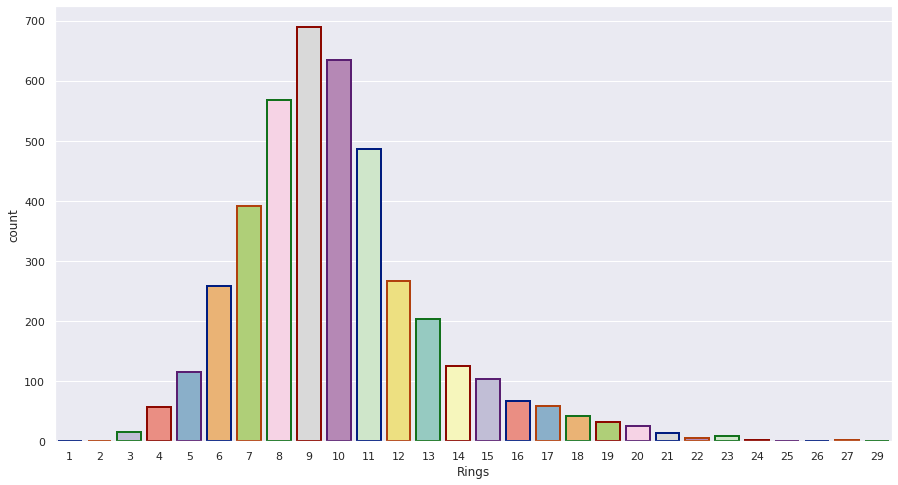

In [120]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.countplot(df['Rings'],linewidth=2,edgecolor=sns.color_palette("dark", 5),palette="Set3")

**Observation** : Data is not Normally Distributed .

In [121]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

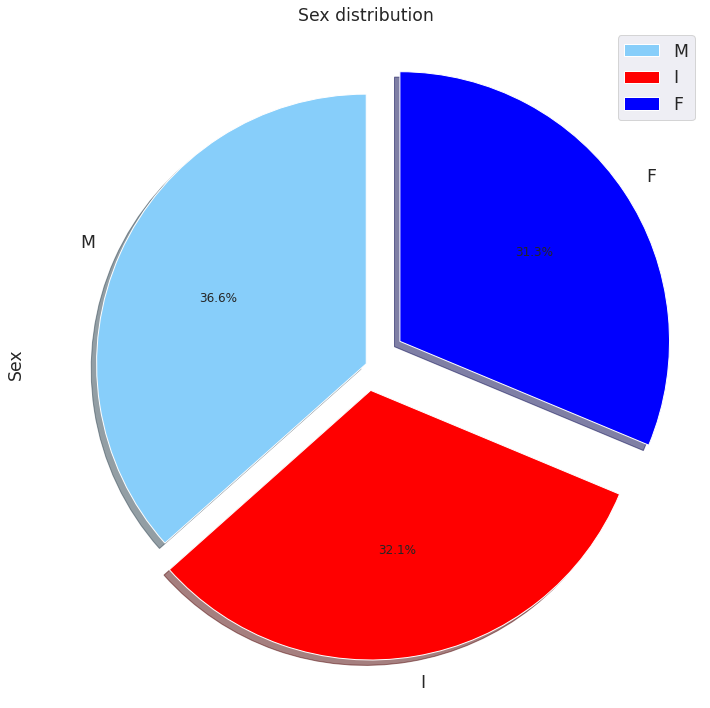

In [122]:
f, ax = plt.subplots(figsize=(15, 10))
order = list(df['Sex'].value_counts().index)

#pop_labels = ['3','4','5','6','7','8']
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','violet']
explode = (0,0.1,0.15)
df['Sex'].value_counts().plot.pie(explode=explode , colors = colors ,startangle=90 ,autopct='%.1f%%',shadow=True, ax=ax)
ax.set_title('Sex distribution');
ax.legend(loc = "upper right") 
plt.tight_layout() 
plt.show()

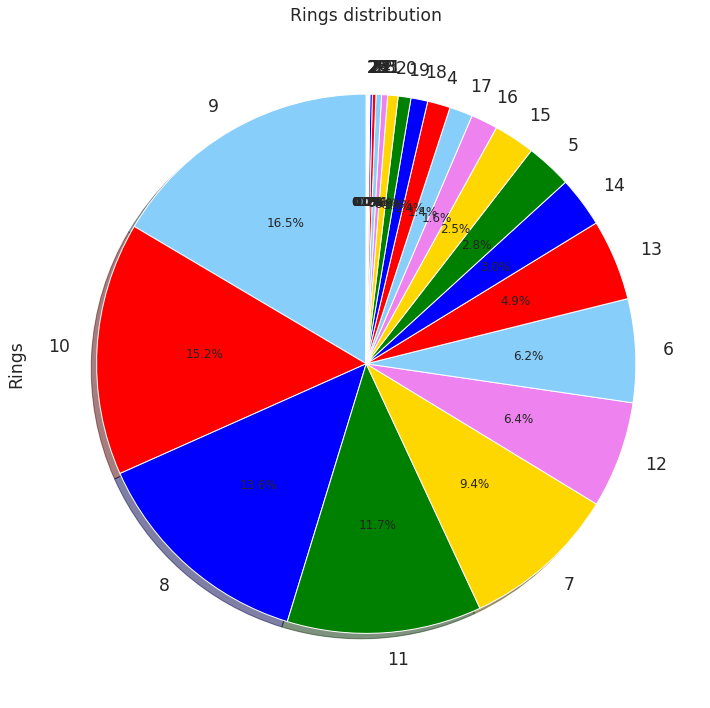

In [123]:
f, ax = plt.subplots(figsize=(25, 10))
order = list(df['Rings'].value_counts().index)

#pop_labels = ['3','4','5','6','7','8']
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','violet']
explode = (0,0.1,0.15)
df['Rings'].value_counts().plot.pie(explode=None , colors = colors ,startangle=90 ,autopct='%.1f%%',shadow=True, ax=ax)
ax.set_title('Rings distribution');
#ax.legend(loc = "upper right") 
plt.tight_layout() 
plt.show()

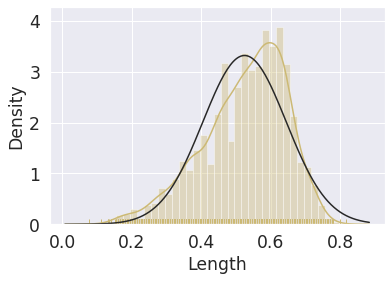

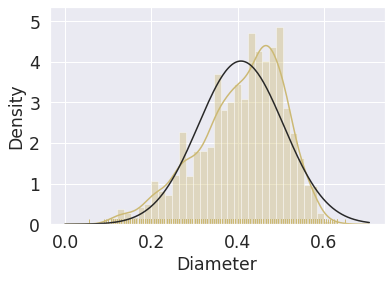

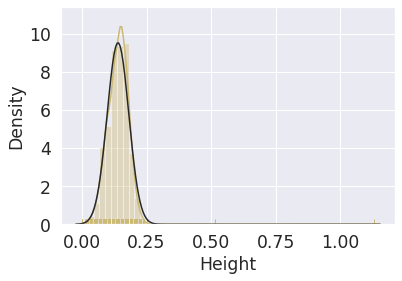

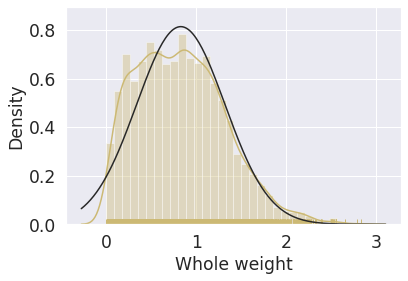

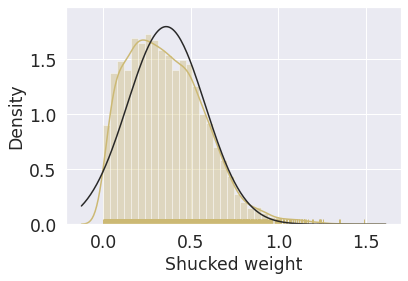

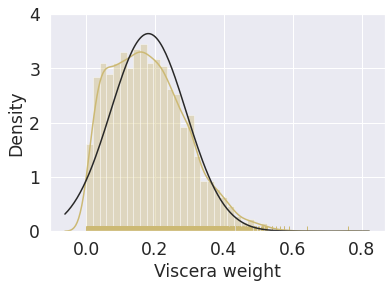

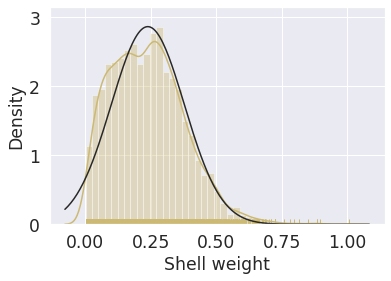

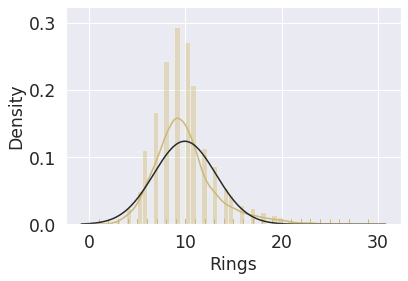

In [124]:
# Making of distplot to show the skewness in different columns

from scipy.stats import norm
for g in df.describe().columns:
    sns.distplot(df[g] , rug=True , color = 'y' , fit=norm)
    plt.show()

**Observation** : It looks like all pecification of abalone are close to normal distribution .

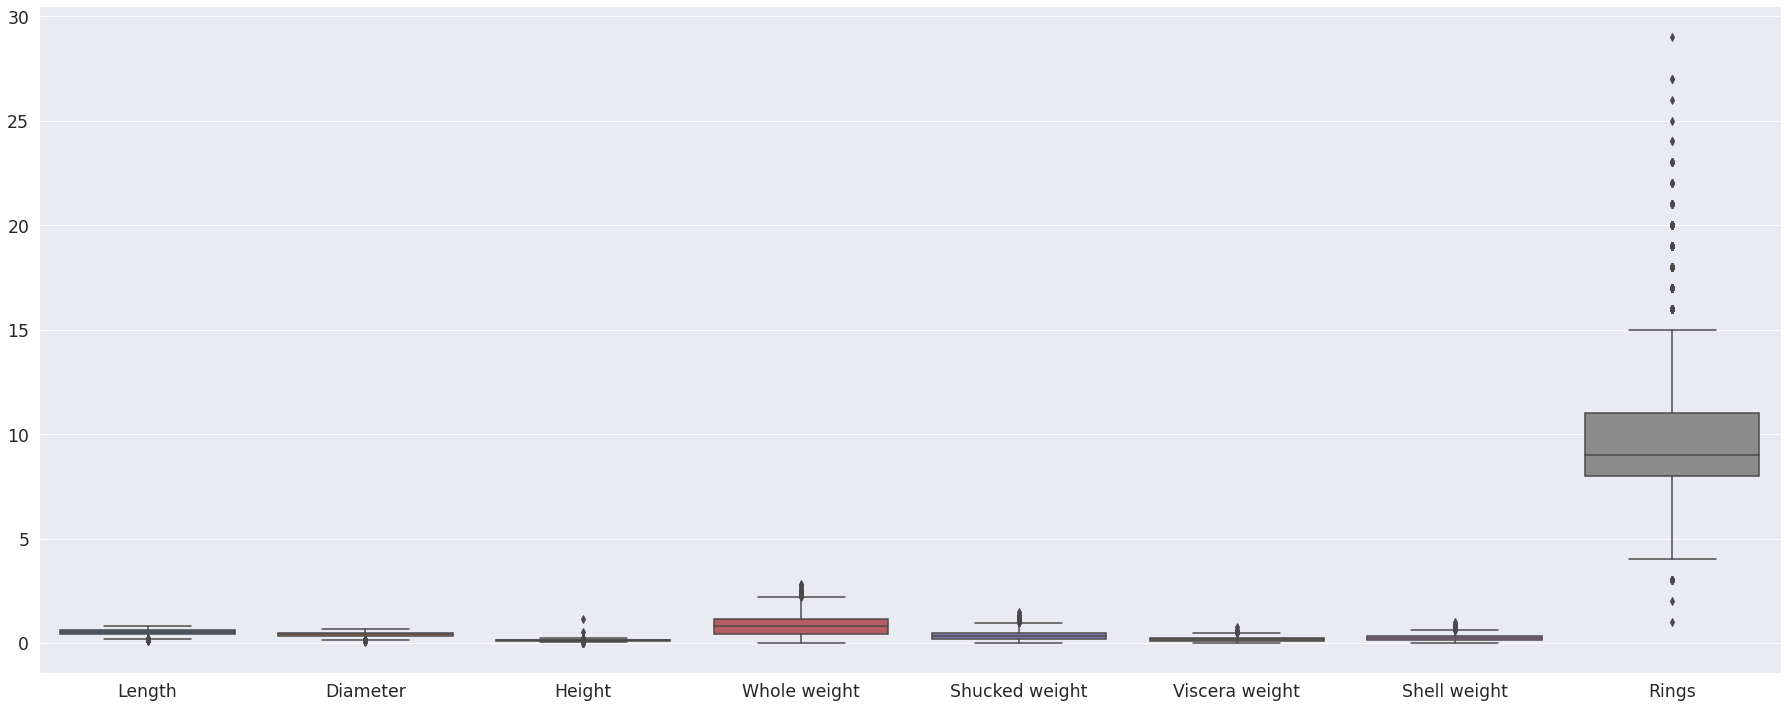

In [125]:
sns.factorplot(data=df,kind='box',size=10,aspect=2.5)

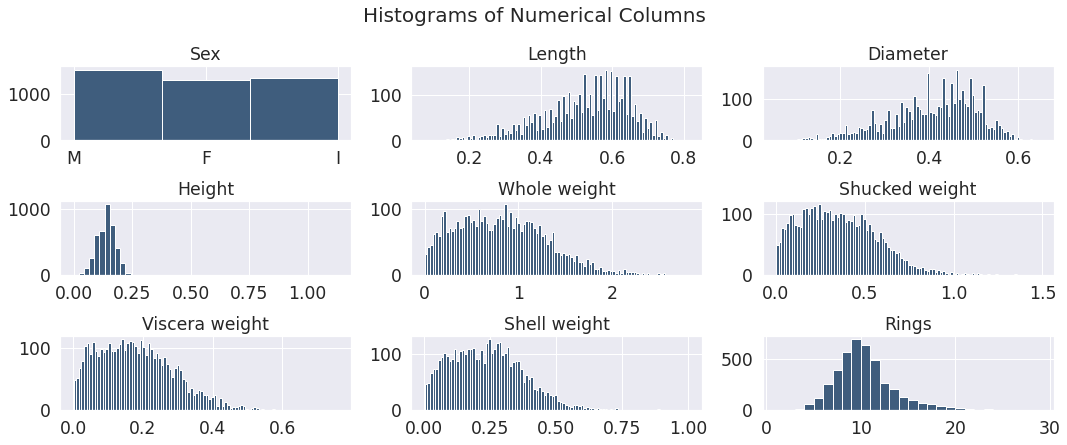

In [126]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df.columns.values[i])

    vals = np.size(df.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## **Bi-variate Analysis**

In [127]:
def plot(feature_x,target='Sex'):
    sns.factorplot(x=target,y=feature_x,data=df,kind='bar',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='violin',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='swarm',size=5,aspect=1)

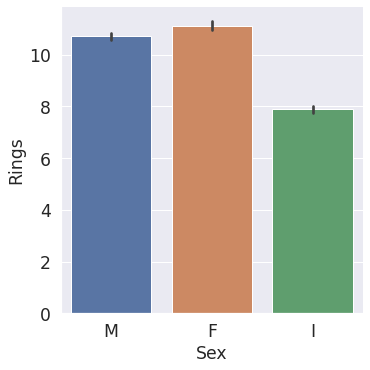

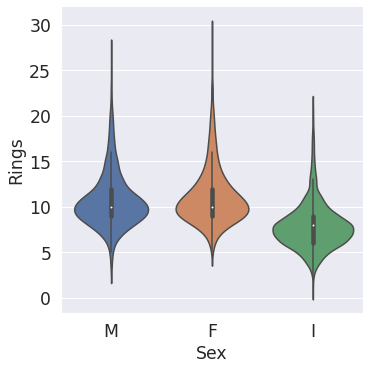

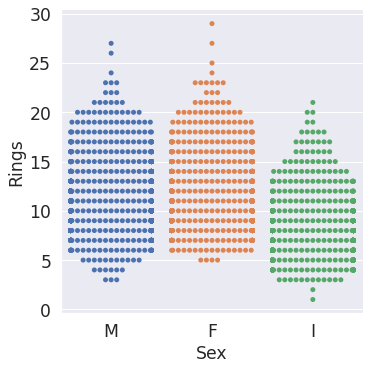

In [128]:
# for fixed acidity.

plot('Rings','Sex')

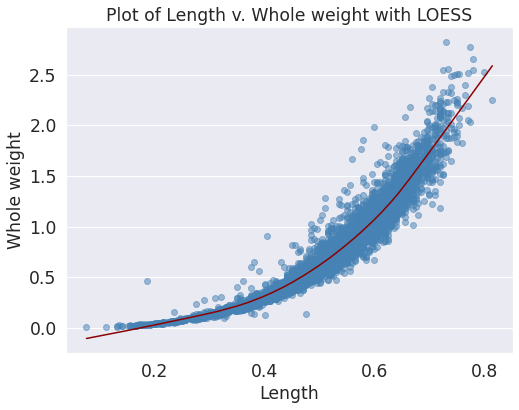

In [129]:
def lowess_scatter(data, x, y, jitter=0.0, skip_lowess=False):
    import statsmodels.api as sm
    if skip_lowess:
        fit = np.polyfit(data[x], data[y], 1)
        line_x = np.linspace(data[x].min(), data[x].max(), 10)
        line = np.poly1d(fit)
        line_y = list(map(line, line_x))
    else:
        lowess = sm.nonparametric.lowess(data[y], data[x], frac=.3)
        line_x = list(zip(*lowess))[0]
        line_y = list(zip(*lowess))[1]

    figure = plt.figure(figsize=(8, 6))
    axes = figure.add_subplot(1, 1, 1)
    xs = data[x]
    if jitter > 0.0:
        xs = data[x] + stats.norm.rvs(0, 0.5, data[x].size)

    axes.scatter(xs, data[y], marker="o", color="steelblue", alpha=0.5)
    axes.plot(line_x, line_y, color="DarkRed")
    title = "Plot of {0} v. {1}".format(x, y)
    if not skip_lowess:
        title += " with LOESS"
    axes.set_title(title)
    axes.set_xlabel(x)
    axes.set_ylabel(y)
    axes.xaxis.grid(False)
    plt.show()
lowess_scatter(df, "Length", "Whole weight")

**Observation** : We can see the plot kind of looks like exponential function with monotonically increasing relationship, and as expected as the weight increase we expect the length of shell to increase as abalone adds new growth rings to it's shell.

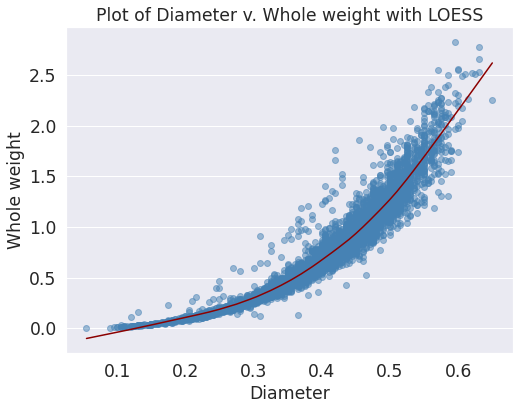

In [130]:
lowess_scatter(df, "Diameter", "Whole weight")

**Observation** : Indeed, we see an exponential curve, similar to length vs. whole weight.

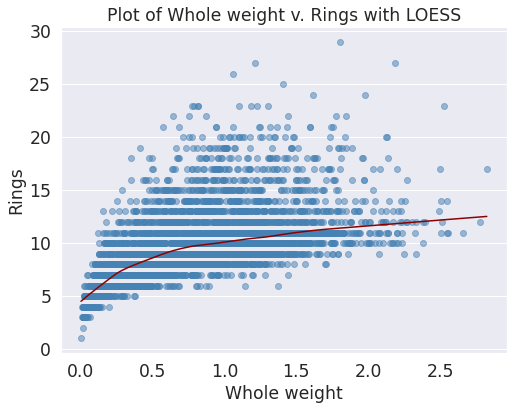

In [131]:
lowess_scatter(df, "Whole weight", "Rings")

**Observation** : As we expected, rings have really weak correlation monotonic increasing relationship with whole weight, the shape of loess line somewhat represents logarithmic curve.

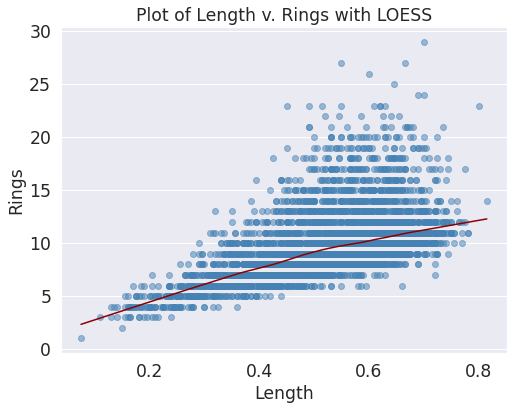

In [132]:
lowess_scatter(df, "Length", "Rings")

**Observation** : As we expected there is indeed presence of weak monotonically linear relation ship of rings with length.

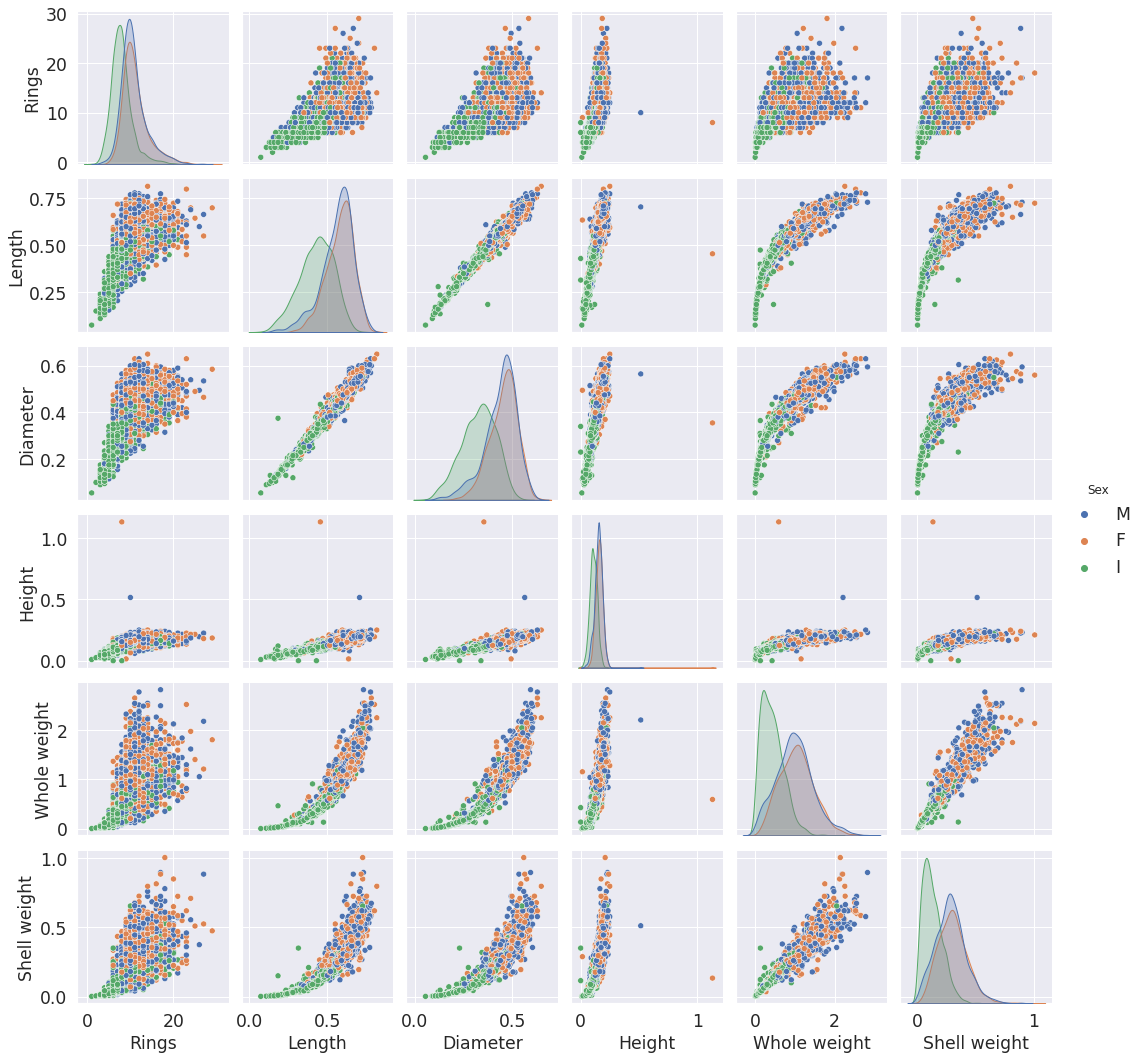

In [133]:
sns.pairplot(df, vars = ['Rings', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shell weight'], hue='Sex');

**Observation** :Clearly, there is a significant difference in dimensions depending on sex, we can see infants < female <= male, which tells us we can even classify between infants and adult abalones.

**Performing Label Encoder**

In [134]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df['Sex']=LE.fit_transform(df['Sex'])

In [135]:
df['Sex'].unique()

array([2, 0, 1])

In [136]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Checking Correlation between variables .

In [137]:
cor=df.corr()

In [138]:
cor

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


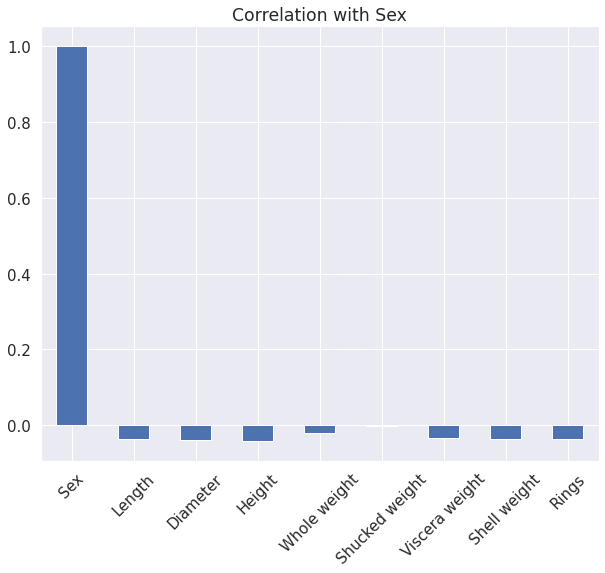

In [139]:
#Correlation with Sex with respect to attributes

df.corrwith(df.Sex).plot.bar(
        figsize = (10, 8), title = "Correlation with Sex", fontsize = 15,
        rot = 45, grid = True)

**Plotting Heatmap**

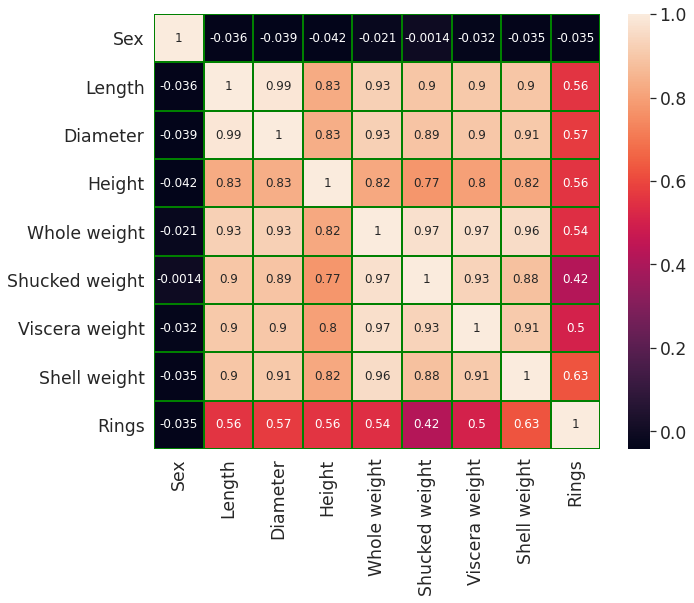

In [140]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,linewidths=1,linecolor='green')
plt.show()

**Observation** : Clearly, there is a significant difference in dimensions depending on sex, we can see infants < female <= male, which tells us we can even classify between infants and adult abalones.

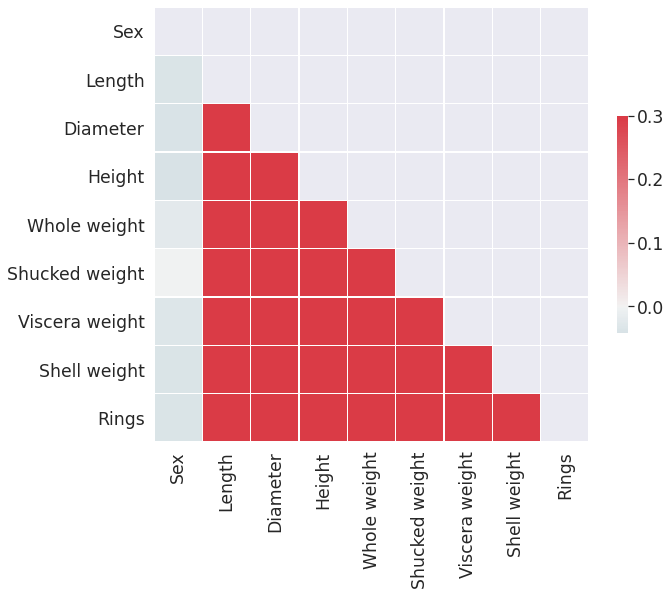

In [141]:
# Generate a mask for the upper triangle
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Observation** :
 Whole Weight is almost linearly varying with all other features 
  Height has least linearity with remaining features

## **Data Cleaning**

**1.Checking Null Values**

In [142]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

**Observation** : There are no null values present in the dataset .

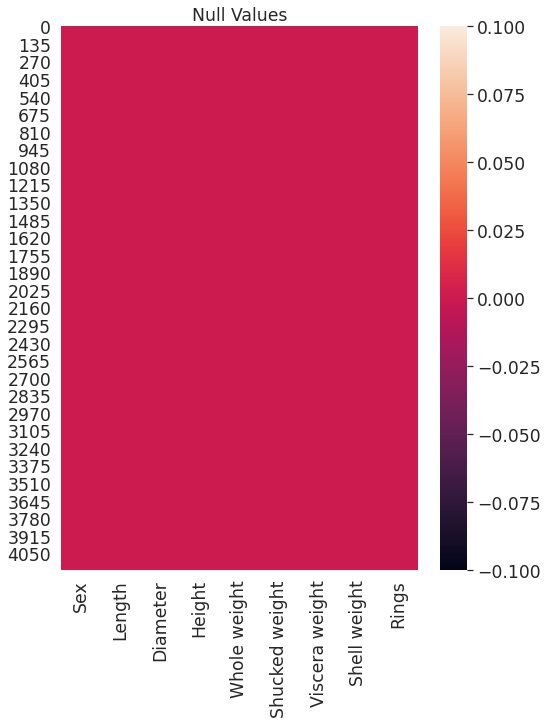

In [143]:
#Plotting Null Values

plt.figure(figsize=[8,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

**2.Checking for Outliers**

In [144]:
#Compute Outliers using zscore method

from scipy.stats import zscore

z=np.abs(zscore(df))

new_df=df [(z<3).all(axis=1)]

In [145]:
df.shape

(4177, 9)

In [146]:
new_df.shape

(4027, 9)

In [147]:
((4177-4027)/4177)*100

3.5910940866650707

**Observation** :There will be a loss of 3.59% of data from the dataset which could be acceptable .

**3.Checking for Skewness**

In [148]:
new_df.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

**Observation** : Variables like length , diameter , rings have more skewness . so lets remove it 

In [149]:
#Using PowerTransformer 

from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method='yeo-johnson')
for i in new_df.skew().index[1:]:
    if new_df.skew().loc[i]>0.55:
        new_df[i]=pt.fit_transform(new_df[i].values.reshape(-1,1))
    if new_df.skew().loc[i]<-0.55:
        new_df[i]=pt.fit_transform(new_df[i].values.reshape(-1,1))
    else:
        new_df[i]=new_df[i]

In [150]:
new_df.skew()

Sex              -0.094886
Length           -0.082985
Diameter         -0.080956
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.004745
dtype: float64

**Observation** : The skewness has been removed and in range between -0.5 to 0.5 . hance data is ready for training .

**Split Data and Target**

In [151]:
#Preparing the Data
#Setting X and y-axis .
#Since we want to predict the Happiness Score of the World Happiness Report, we will drop the ‘Rings’ column.

X = new_df.drop(['Rings'], axis=1)
y = new_df['Rings']

**Scaling of Data**

Here we need to standardize them so that we can use the data properly. To do this, we need to apply the Scaling process to the data. Scikit-Learn's "StandardScaler" class can be used for this process:

In [152]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [153]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.325877,0.351595,0.340426,0.224595,0.216510,0.204268,0.223077
1,1.0,0.179873,0.179722,0.319149,0.094874,0.092931,0.097561,0.100000
2,0.0,0.454003,0.467921,0.510638,0.297887,0.248146,0.286585,0.315385
3,1.0,0.302750,0.351595,0.468085,0.225495,0.207612,0.230691,0.230769
4,0.5,0.156016,0.165052,0.276596,0.085656,0.083045,0.079268,0.076923
...,...,...,...,...,...,...,...,...
4022,0.0,0.521398,0.538706,0.638298,0.392311,0.360356,0.484756,0.375385
4023,1.0,0.572707,0.514509,0.510638,0.427833,0.428571,0.434959,0.393077
4024,1.0,0.593996,0.601925,0.808511,0.522257,0.514088,0.583333,0.466154
4025,0.0,0.649190,0.628333,0.574468,0.485612,0.519525,0.529472,0.447692


In [154]:
new_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,-0.684451,-0.543379,0.095,0.5140,0.2245,0.1010,0.150,1.673028
1,2,-1.411739,-1.401132,0.090,0.2255,0.0995,0.0485,0.070,-0.978127
2,0,-0.046219,0.037163,0.135,0.6770,0.2565,0.1415,0.210,-0.159439
3,2,-0.799651,-0.543379,0.125,0.5160,0.2155,0.1140,0.155,0.200092
4,1,-1.530577,-1.474343,0.080,0.2050,0.0895,0.0395,0.055,-0.978127


**Preparation of Test and Train Data**

The final process here is the smooth and random separation of test and train data. For this, we will benefit from the method named "train_testsplit" from the Scikit-Learn library. I would like to use 20% of our data for testing and 80% for training purposes. The process is very simple:

In [155]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=6)

# Parameters:
# test_size : It decides how many test data in percentage.
# random_state : This parameter can take any value. This value decides randomness seed.

**Building Model**

In [172]:
#Importing Packages

from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [191]:
np.random.seed(10)
def rmse_cv(model, X_train, y):
    rmse =- (cross_val_score(model, X_train, y, scoring='neg_mean_squared_error', cv=5))
    return(rmse*100)

models = [LinearRegression(),
             Ridge(),
             SVR(),
             RandomForestRegressor(),
             GradientBoostingRegressor(),
             KNeighborsRegressor(n_neighbors = 4),]

names = ['LR','Ridge','svm','GNB','RF','GB','KNN']

for model,name in zip(models,names):
    score = rmse_cv(model,X_train,y_train)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 45.535784, 2.120783
Ridge    : 46.043444, 1.997817
svm    : 38.751383, 0.741109
GNB    : 39.549748, 1.124257
RF    : 38.668305, 1.187657
GB    : 44.658654, 0.719264


In [192]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Rings'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = -cross_val_score(alg, dtrain[predictors], dtrain['Rings'], cv=cv_folds, 
                                                    scoring='r2')
    
    #Print model report:
    print ("\nModel Report")
    print( "RMSE : %.4g" % mean_squared_error(dtrain['Rings'].values, dtrain_predictions))
    print( "R2 Score (Train): %f" % r2_score(dtrain['Rings'], dtrain_predictions))
    if performCV:
        print( "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.coef_, predictors).sort_values(ascending=False)
        plt.figure(figsize=(20,4))
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
RMSE : 0.4675
R2 Score (Train): 0.532477
CV Score : Mean - -0.4579511 | Std - 0.0679943 | Min - -0.5335681 | Max - -0.3639021


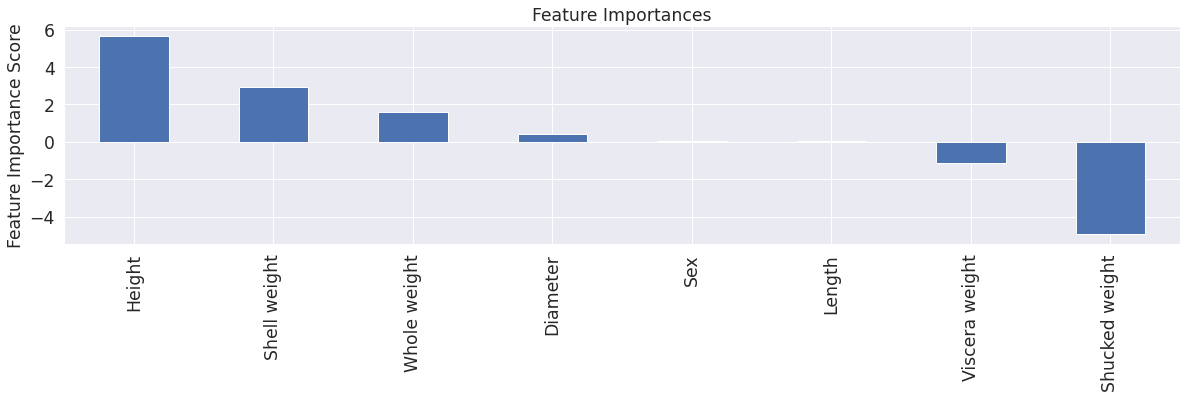

In [193]:
# Base Model
predictors = [x for x in new_df.columns if x not in ['Rings']]
lrm0 = Ridge(random_state=10)
modelfit(lrm0, new_df, predictors)

**Hyperparameter tunning using GrideSearchCV**

In [194]:
# Let's do hyperparameter tunning using GrideSearchCV
from sklearn.model_selection import  GridSearchCV
param  = {'alpha':[0.01, 0.1, 1,10,100],
         'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
glrm0 = GridSearchCV(estimator = Ridge(random_state=10,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
glrm0.fit(X_train, y_train)
glrm0.best_params_, glrm0.best_score_

({'alpha': 0.01, 'solver': 'sparse_cg'}, 0.5396225750495475)


Model Report
RMSE : 0.4593
R2 Score (Train): 0.540711
CV Score : Mean - -0.4691981 | Std - 0.06870295 | Min - -0.536216 | Max - -0.3597866


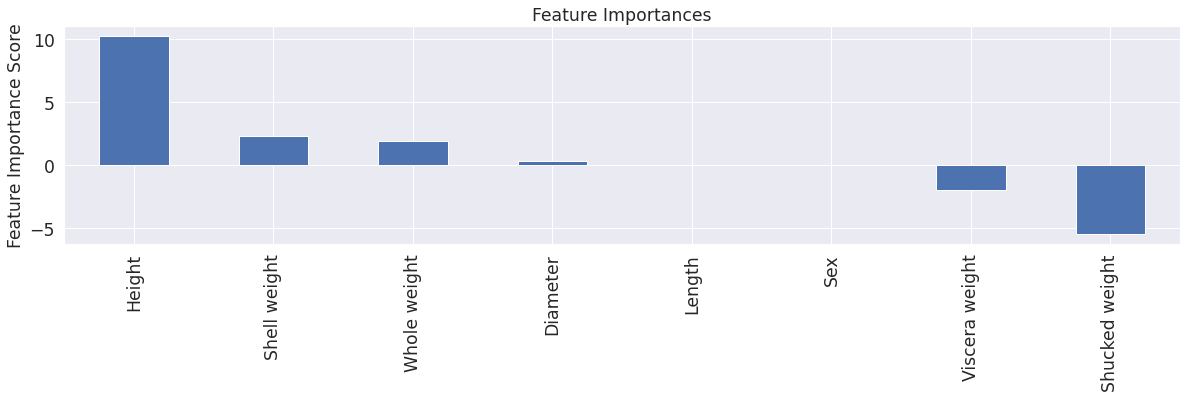

In [195]:
modelfit(Ridge(alpha = 0.1,random_state=10,), new_df, predictors)

CV score has improved slightly while, R2_score has decreased showing base model was overfitted. Using above process multiple options can be tried to could up with much more robust model. This process can also be tried on different models : RF, GB, etc.

**Saving Final Model**

In [196]:
# Dumping Data in pickle file.
import joblib
joblib.dump(pred,'Abalone.pkl')

['Abalone.pkl']

## Table of Contents

### [Preface](00.00-Preface.ipynb)

### [1. IPython: Beyond Normal Python](01.00-IPython-Beyond-Normal-Python.ipynb)
- [Help and Documentation in IPython](01.01-Help-And-Documentation.ipynb)
- [Keyboard Shortcuts in the IPython Shell](01.02-Shell-Keyboard-Shortcuts.ipynb)
- [IPython Magic Commands](01.03-Magic-Commands.ipynb)
- [Input and Output History](01.04-Input-Output-History.ipynb)
- [IPython and Shell Commands](01.05-IPython-And-Shell-Commands.ipynb)
- [Errors and Debugging](01.06-Errors-and-Debugging.ipynb)
- [Profiling and Timing Code](01.07-Timing-and-Profiling.ipynb)
- [More IPython Resources](01.08-More-IPython-Resources.ipynb)

### [2. Introduction to NumPy](02.00-Introduction-to-NumPy.ipynb)
- [Understanding Data Types in Python](02.01-Understanding-Data-Types.ipynb)
- [The Basics of NumPy Arrays](02.02-The-Basics-Of-NumPy-Arrays.ipynb)
- [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb)
- [Aggregations: Min, Max, and Everything In Between](02.04-Computation-on-arrays-aggregates.ipynb)
- [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb)
- [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb)
- [Fancy Indexing](02.07-Fancy-Indexing.ipynb)
- [Sorting Arrays](02.08-Sorting.ipynb)
- [Structured Data: NumPy's Structured Arrays](02.09-Structured-Data-NumPy.ipynb)

### [3. Data Manipulation with Pandas](03.00-Introduction-to-Pandas.ipynb)
- [Introducing Pandas Objects](03.01-Introducing-Pandas-Objects.ipynb)
- [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb)
- [Operating on Data in Pandas](03.03-Operations-in-Pandas.ipynb)
- [Handling Missing Data](03.04-Missing-Values.ipynb)
- [Hierarchical Indexing](03.05-Hierarchical-Indexing.ipynb)
- [Combining Datasets: Concat and Append](03.06-Concat-And-Append.ipynb)
- [Combining Datasets: Merge and Join](03.07-Merge-and-Join.ipynb)
- [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb)
- [Pivot Tables](03.09-Pivot-Tables.ipynb)
- [Vectorized String Operations](03.10-Working-With-Strings.ipynb)
- [Working with Time Series](03.11-Working-with-Time-Series.ipynb)
- [High-Performance Pandas: eval() and query()](03.12-Performance-Eval-and-Query.ipynb)
- [Further Resources](03.13-Further-Resources.ipynb)

### [4. Visualization with Matplotlib](04.00-Introduction-To-Matplotlib.ipynb)
- [Simple Line Plots](04.01-Simple-Line-Plots.ipynb)
- [Simple Scatter Plots](04.02-Simple-Scatter-Plots.ipynb)
- [Visualizing Errors](04.03-Errorbars.ipynb)
- [Density and Contour Plots](04.04-Density-and-Contour-Plots.ipynb)
- [Histograms, Binnings, and Density](04.05-Histograms-and-Binnings.ipynb)
- [Customizing Plot Legends](04.06-Customizing-Legends.ipynb)
- [Customizing Colorbars](04.07-Customizing-Colorbars.ipynb)
- [Multiple Subplots](04.08-Multiple-Subplots.ipynb)
- [Text and Annotation](04.09-Text-and-Annotation.ipynb)
- [Customizing Ticks](04.10-Customizing-Ticks.ipynb)
- [Customizing Matplotlib: Configurations and Stylesheets](04.11-Settings-and-Stylesheets.ipynb)
- [Three-Dimensional Plotting in Matplotlib](04.12-Three-Dimensional-Plotting.ipynb)
- [Geographic Data with Basemap](04.13-Geographic-Data-With-Basemap.ipynb)
- [Visualization with Seaborn](04.14-Visualization-With-Seaborn.ipynb)
- [Further Resources](04.15-Further-Resources.ipynb)

### [5. Machine Learning](05.00-Machine-Learning.ipynb)
- [What Is Machine Learning?](05.01-What-Is-Machine-Learning.ipynb)
- [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb)
- [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb)
- [Feature Engineering](05.04-Feature-Engineering.ipynb)
- [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb)
- [In Depth: Linear Regression](05.06-Linear-Regression.ipynb)
- [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)
- [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb)
- [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb)
- [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb)
- [In Depth: k-Means Clustering](05.11-K-Means.ipynb)
- [In Depth: Gaussian Mixture Models](05.12-Gaussian-Mixtures.ipynb)
- [In-Depth: Kernel Density Estimation](05.13-Kernel-Density-Estimation.ipynb)
- [Application: A Face Detection Pipeline](05.14-Image-Features.ipynb)
- [Further Machine Learning Resources](05.15-Learning-More.ipynb)

### [Appendix: Figure Code](06.00-Figure-Code.ipynb)